### Part I:  
### **1. 資料清理與視覺化圖表**  

(1) 先使用df.info() 來檢查數據樣本是否出現遺漏值

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('HW1_house_data.csv')
df.info()
df = df.dropna() #刪除所有含nan的值
df.isnull().sum() #檢查是否有遺漏值

FileNotFoundError: [Errno 2] No such file or directory: 'HW1_house_data.csv'

執行後發現無任何的遺漏值(每個特徵的樣本皆是non-null)，所以不須刪除或修改任何樣本  

(2)視覺化圖表  

A.房價的分布(直方圖):  
以下我使用sns.histplot來觀察房價(price)數據的分布情況，由圖可以看出數值較為集中，大致為常態分佈，且有部分的離群值


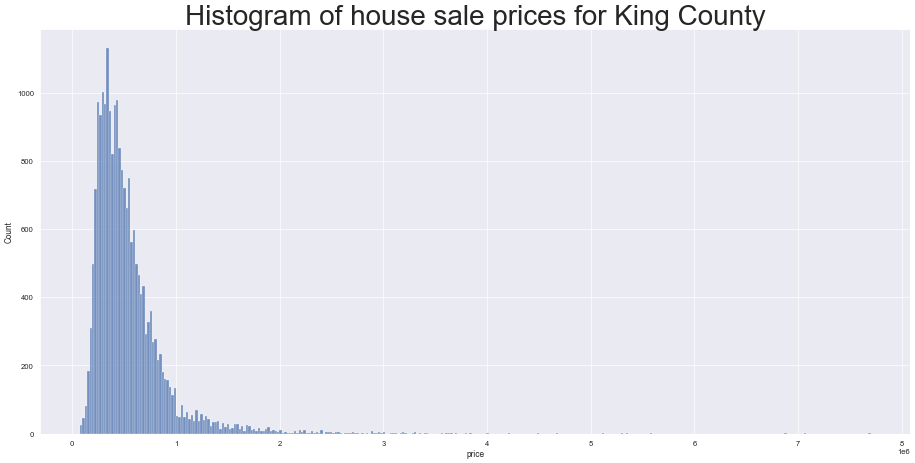

In [ ]:
sns.set()
plt.figure(figsize=(20, 10), dpi=50)
sns.histplot(df.price)
plt.title("Histogram of house sale prices for King County", fontsize = 40)
plt.show()


B.清除離群值:  
為了避免部分離群的price影響模型的結果，這裡採用四分位數區間(IQR)來檢測離群值，並直接刪除檢測的離群值。

In [ ]:
def outlier_idx(x):
    q1, q3 = np.percentile(x, [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where((x < lower_bound) | (x > upper_bound))

# 找出 HP 的離群值
idx = outlier_idx(df['price'])[0]
df.take(idx)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,20140612T000000,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,4389200955,20150302T000000,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,20150130T000000,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,20150107T000000,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


In [ ]:
# 找出price的離群值之index
idx = outlier_idx(df['price'])[0]

# 刪除離群值
df = df.drop(idx)

# 以下輸出刪除後離群值的dataset
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

清除離群值後再檢視一次值方圖，發現x軸的尺度所小了許多，資料也更集中，以利我們後續的模型建立。

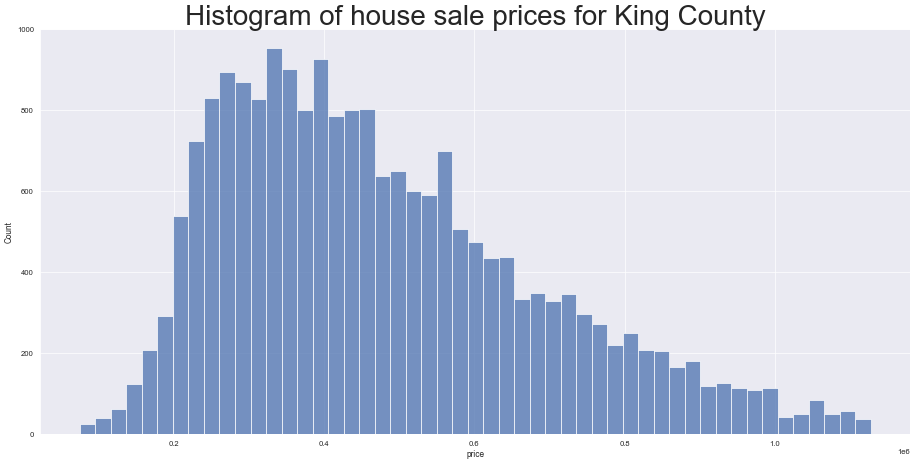

In [ ]:
sns.set()
plt.figure(figsize=(20, 10), dpi=50)
sns.histplot(df.price)
plt.title("Histogram of house sale prices for King County", fontsize = 40)
plt.show()

### **2.敘述性統計分析**  

透過敘述性統計分析，可以來了解樣本的屬性，樣本之敘述統計量包含平均數、中位數、標準差、變異數、最大值/最小值等等，以下為計算結果:


In [ ]:
# 計算平均值
print('price平均值：', df['price'].mean())
# 計算中位數
print('priceP中位數：', df['price'].median())
# 計算變異數、標準差
print('price變異數：', df['price'].var())
print('price標準差：', df['price'].std())
# 計算最大值，最小值與全距(range)
print('price最大值：', df['price'].max())
print('price最小值：', df['price'].min())
print('price全距：', df['price'].max()-df['price'].min())


df.describe() #顯示所有特徵的數據分析

price平均值： 476984.55943714274
priceP中位數： 437500.0
price變異數： 43418582690.06248
price標準差： 208371.26167027562
price最大值： 1127500.0
price最小值： 75000.0
price全距： 1052500.0


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.329750,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.912885,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


房價(price)的總平均數為476984，中位數為437500，平均數較中位數高，表示房價數據分佈右偏（正偏）或有正態分佈的長尾向右延伸  
以下以price來繪製四分位箱型圖:  

{'whiskers': [<matplotlib.lines.Line2D at 0x13591defc70>,
 'caps': [<matplotlib.lines.Line2D at 0x13582fc01f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13591def820>],
 'medians': [<matplotlib.lines.Line2D at 0x13582fc0730>],
 'fliers': [<matplotlib.lines.Line2D at 0x13582fc09d0>],
 'means': []}

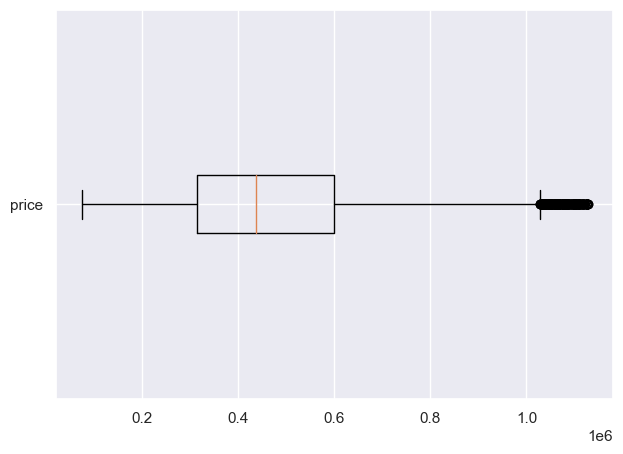

In [ ]:
data = df['price'].tolist() # 取得 'price' 列的數據，並轉換為列表格式
plt.boxplot(data, labels=['price'], vert=False) # 繪製相形圖

此箱型圖的箱子落在0到1之間，說明了price列的大部分數值都集中在比較小的數值範圍內，且圖的右側也仍有一些的離群值。

### **3.特徵相關性分析**  


(1) 相關係數熱度圖  
透過相關係數熱度圖可以觀察到，和**price**正相關係數最高的是**grade**(0.63)，其次是**sqft_living**(0.62)(房子的面積)，也就是這兩者呈高度的正相關，但因為grade的數值並不連續(為離散、正整數的數值組成)，因此，我將使用相關係數次高的sqft_living用來建立下述的簡單線性回歸線

C:\Users\user\AppData\Local\Temp\ipykernel_22916\815691437.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.loc[:, 'id':'sqft_lot15'].corr()


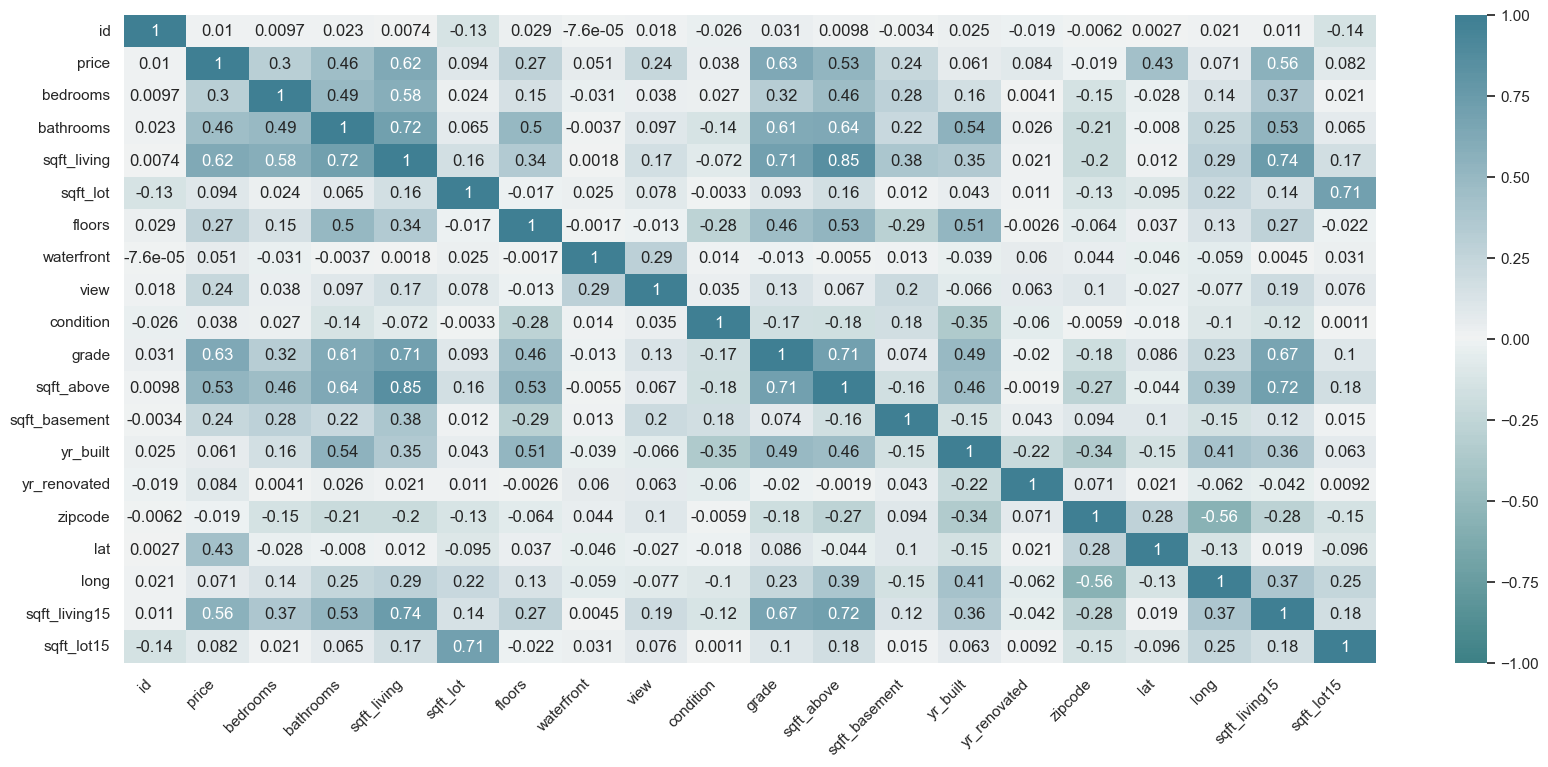

In [ ]:
corr = df.loc[:, 'id':'sqft_lot15'].corr()
ax = plt.subplots(figsize=(18, 8))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 220, n=200),
     annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

(2) 散點圖矩陣分析

<Figure size 2000x1000 with 0 Axes>

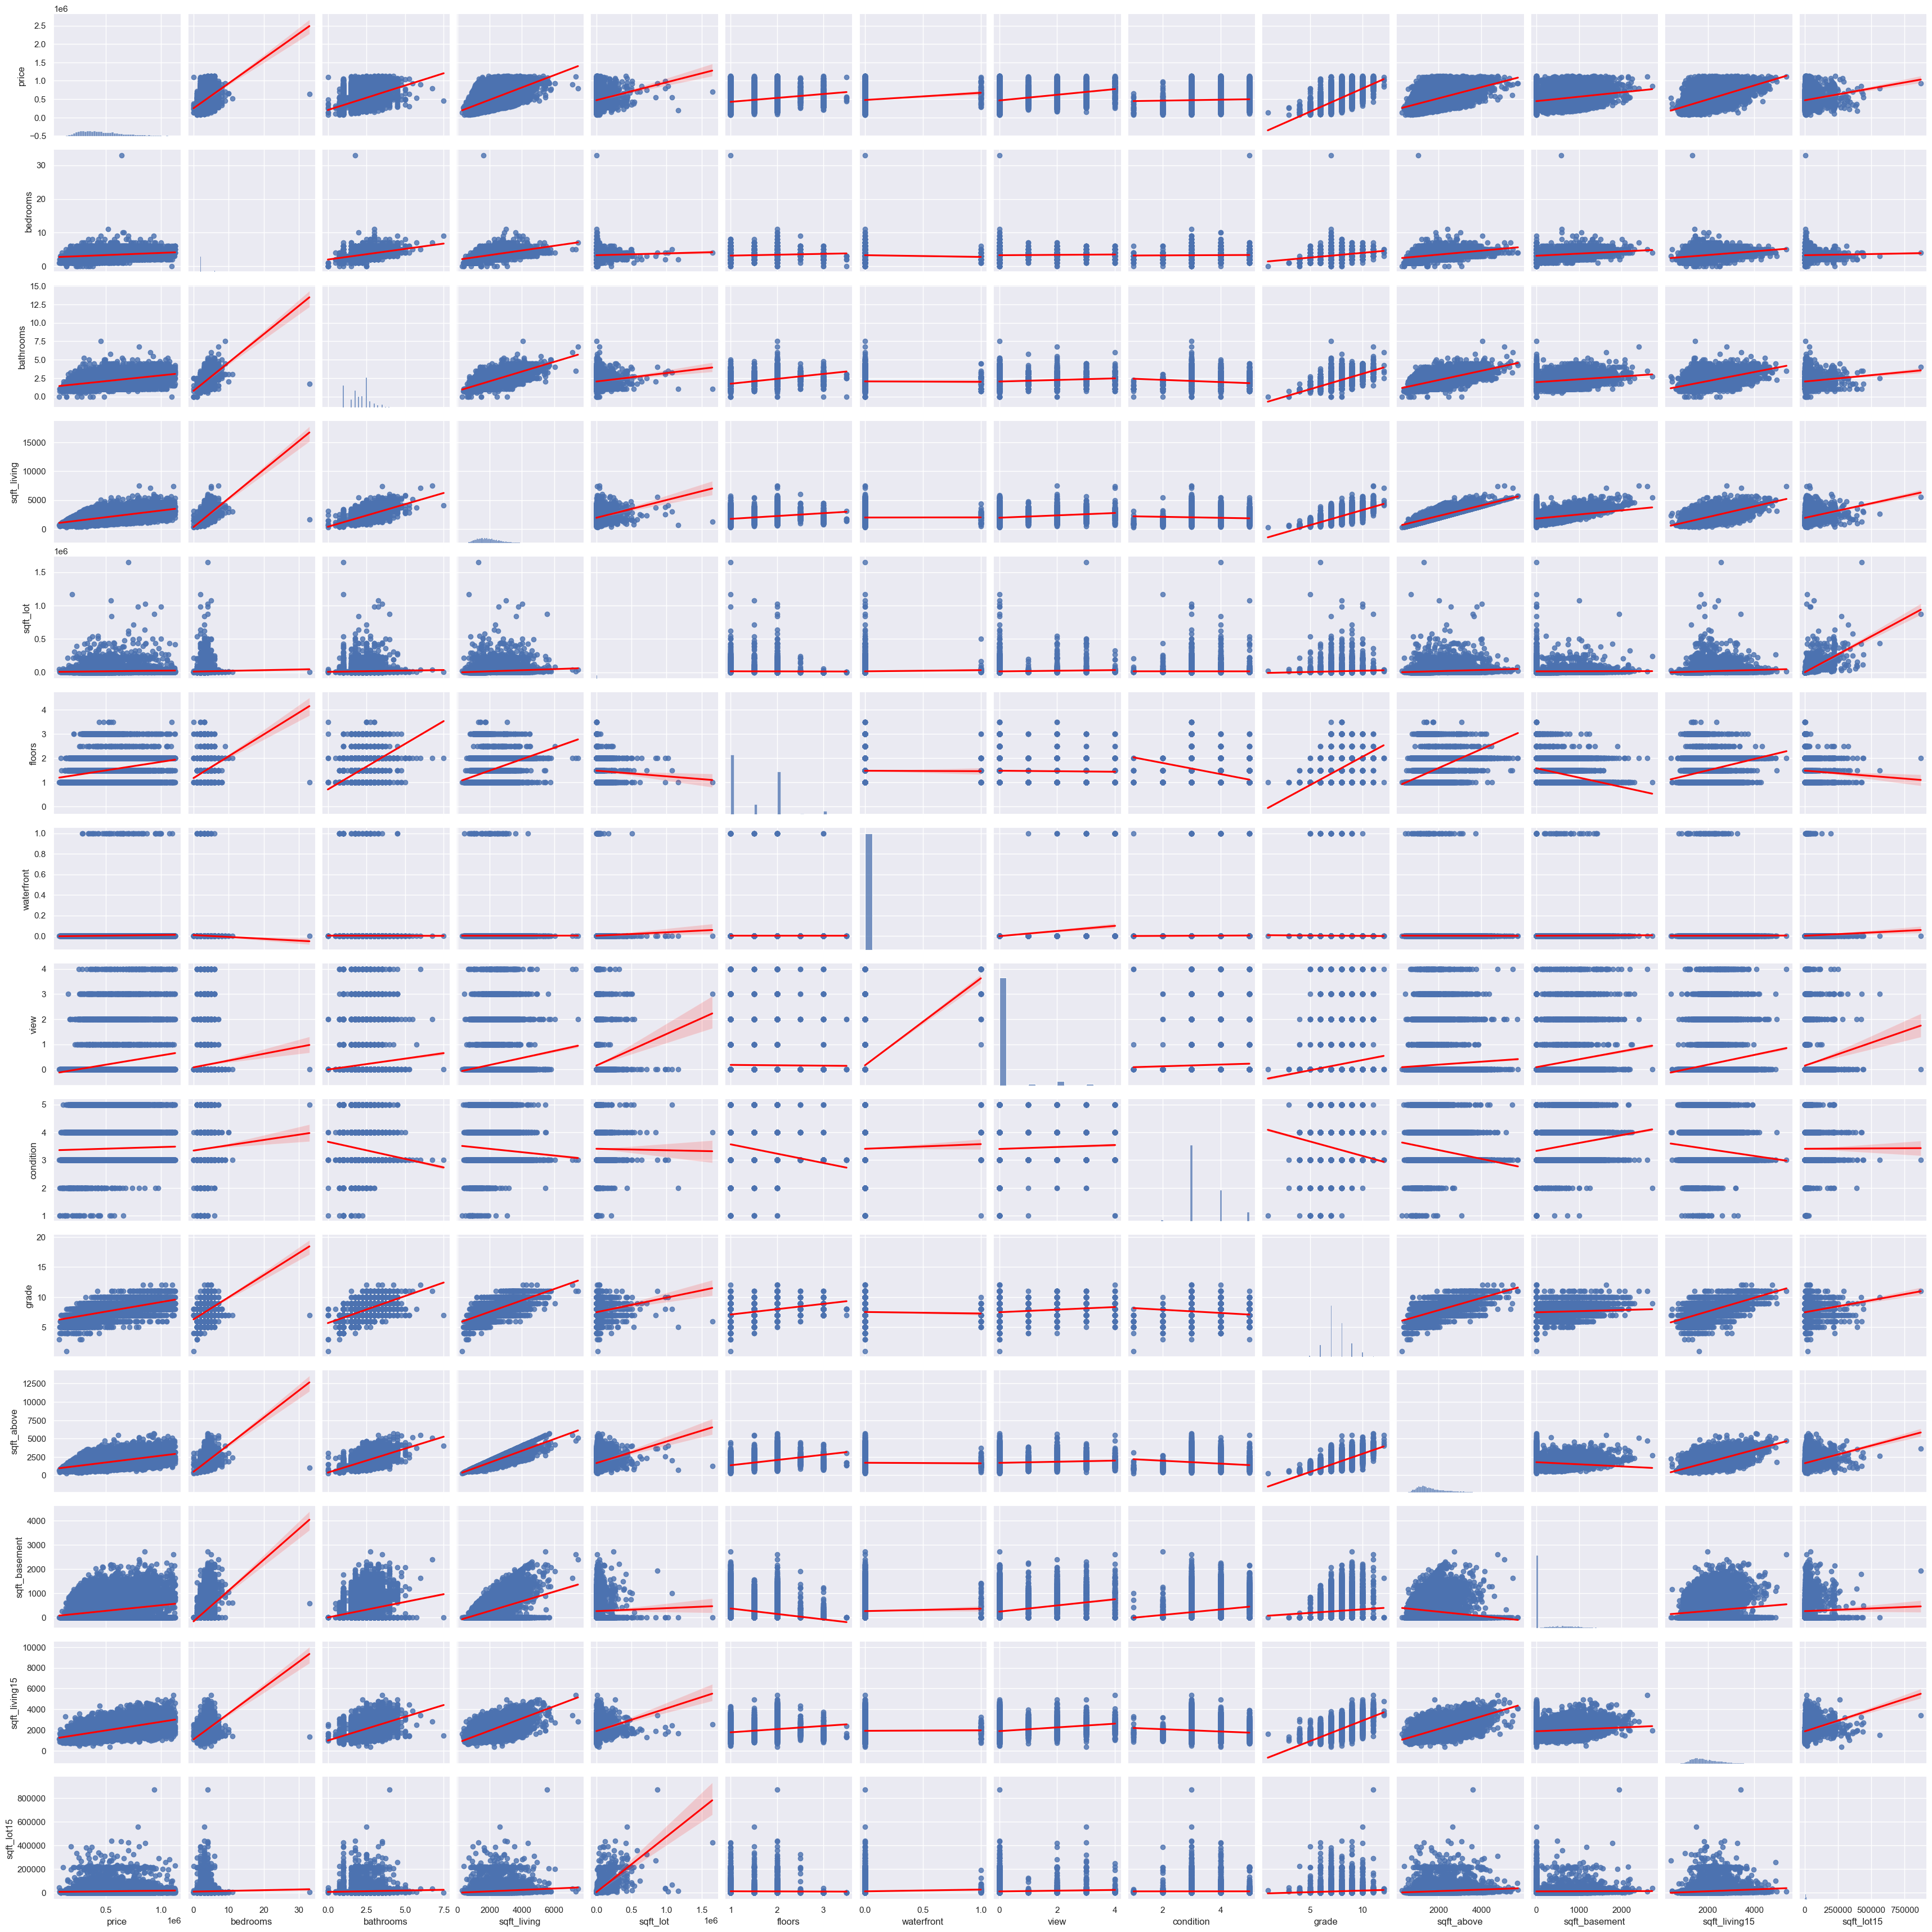

In [ ]:
color = 'red'

plt.figure(figsize=(20, 10))

# 使用pairplot繪製迴歸線
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']],
             kind="reg", plot_kws={'line_kws': {'color': color}})

plt.show()

若看第一列的所有圖表(固定price，比對其他特徵向量)，可以發現幾乎每個特徵的回歸線斜率是正的，代表每個特徵對price有一定的影響。

### Part II:  
### **4. 資料分割與建置迴歸模型**  


(1) 首先將dataset中以80:20(訓練集:測試集)的比例切割，接者使用表格查看數據集(y)、訓練(y_train)與測試集(y_test)的類別比例

In [ ]:
from sklearn.model_selection import train_test_split

# 去除不需要的特徵
housePricedf = df.drop(['id', 'date', 'zipcode', 'price','sqft_above'], axis=1) #將目標price，以及id、date、zipcode、sqft_above刪除
X = housePricedf

dfColumsName = df.columns
y = df
y = y.drop((dfColumsName.drop('price')), axis=1)

# 訓練集與測試集比例為80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=52)
# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat([y.value_counts(), 
                      y_train.value_counts(), 
                      y_test.value_counts()], axis=1)
df_count.columns = ['y', 'y_train', 'y_test']
df_count.head()

NameError: name 'df' is not defined

(2)建立簡單線性迴歸(simple linear regression)  


w_1 = [167.36021925] (為斜率)
w_0 = [146354.71150074] (為截距)


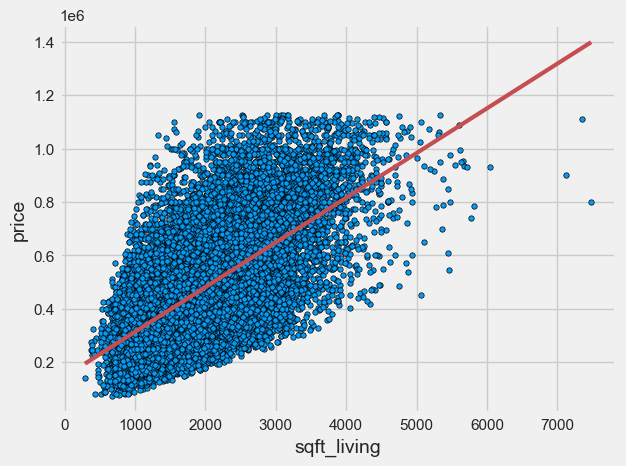

In [ ]:
plt.style.use('fivethirtyeight')

x, y = df.loc[:, ['sqft_living']], df.loc[:, ['price']]  
lr = LinearRegression()
lr.fit(x, y)
print('w_1 =', lr.coef_[0],"(為斜率)")
print('w_0 =', lr.intercept_,"(為截距)")

plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=15)
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel("price", fontsize=14)
# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)
n_y = lr.intercept_ + lr.coef_[0] * n_x
plt.plot(n_x, n_y, color='r', lw=3);

由上圖的回歸模型可知，迴歸係數約為167.36，即當增加一個單位後，price會上漲167.36個單位

(3)建置多元線性迴歸(multiple linear regression)  
使用LinearRegression()建立並擬和多元線性回歸模型

In [ ]:
from sklearn.linear_model import LinearRegression

# 去除不需要的特徵
housePricedf = df.drop(['id', 'date', 'zipcode', 'price'], axis=1)

X = housePricedf

# 目標變量
y = df['price']

# 建立並擬合多元線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

print('w_0 =', model.intercept_)



w_0 = [-23128888.97329815]


接著使用VIF查看是否有大於10的值

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()
X_vif['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

c:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_living,inf
3,sqft_lot,2.048684
4,floors,2.064624
5,waterfront,1.106829
6,view,1.225070
7,condition,1.225739
8,grade,2.833884
9,sqft_above,inf


發現有三個特徵(sqft_living、sqft_above、sqft_basement)VIF高，將sqft_above特徵清除後，再跑一次多元線性回歸模型

In [ ]:
housePricedf = df.drop(['id', 'date', 'zipcode', 'price','sqft_above'], axis=1)

X = housePricedf

y = df['price']

model = LinearRegression()
model.fit(X_train, y_train)

print('w_0 =', model.intercept_)

NameError: name 'df' is not defined

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif_two = X.copy()
X_vif_two['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif_two.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif_two.values, i) for i in range(X_vif_two.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_living,5.301610
3,sqft_lot,2.048684
4,floors,2.064624
5,waterfront,1.106829
6,view,1.225070
7,condition,1.225739
8,grade,2.833884
9,sqft_basement,1.933015


清除完sqft_above後，sqft_above後發現數值下降了許多，每一個特徵的VIF皆在10以下，以此來重新建立新的迴歸模型

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)  # 增加常數行作為截距項
model1 = sm.OLS(y, X)
result = model1.fit()
print('迴歸係數：', result.params)
result.summary() #使用statsmodels套件進行迴歸分析

NameError: name 'X' is not defined

### **5. 模型效能評估** 


(1)簡單線性迴歸

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測目標值
y_pred = lr.predict(x)

# 計算MSE
mse = mean_squared_error(y, y_pred)

# 計算R平方
r2 = r2_score(y, y_pred)

print("簡單線性回歸之 MSE:", mse)
print("簡單線性回歸之 R^2:", r2)

NameError: name 'lr' is not defined

(2)多元線性迴歸

In [ ]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('多元線性回歸之 MSE(training): %.3f, MSE(testing): %.3f' %( 
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

print('多元線性回歸之 R^2(training): %.3f, R^2(testing): %.3f' %( 
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

NameError: name 'LinearRegression' is not defined

### **6. 預測結果分析** 

多元線性迴歸

(1)	實際值與預測值的散點圖  
下圖中以x軸當作price實際值，y軸當作price預測值，來觀察兩者之間的關係。紅色線表示通過線性回歸模型擬合的回歸線，代表實際價格與模型預測價格之間的線性關係。黃色線表示完全預測準確的情況，即實際價格等於預測價格。

In [ ]:
y_predict = model.predict(X_test)

y_test_1d = np.ravel(y_test)
coefs = np.polyfit(y_test_1d, y_predict, 1)

plt.scatter(y_test, y_predict)

plt.plot(y_test, coefs[0]*y_test + coefs[1], color='red') #繪製迴歸線
plt.title("Actual vs. Predicted Price", fontsize = 20)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y), max(y)], [min(y), max(y)], 'y') #繪製對角線
plt.show

print('coefs[0](斜率): %.3f' %(coefs[0]))



NameError: name 'model' is not defined

(2) 殘差分析  
採用Kolmogorov-Smirnov常態性檢定來檢查殘差值是否呈現常態分佈

In [ ]:
import statsmodels.api as sm
from scipy.stats import kstest


X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

# Kolmogorov-Smirnov 常態性檢定
stat, p = kstest(model.resid, 'norm')
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('是常態分布（無法拒絕H0）')
else:
    print('非常態分布（拒絕H0）')


NameError: name 'X' is not defined

使用 qqplot 函數來繪製殘差的 QQ 圖，用來檢查一個樣本是否符合常態分佈

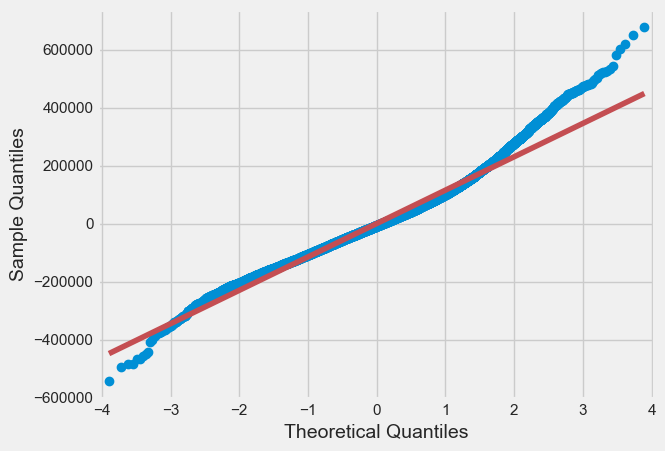

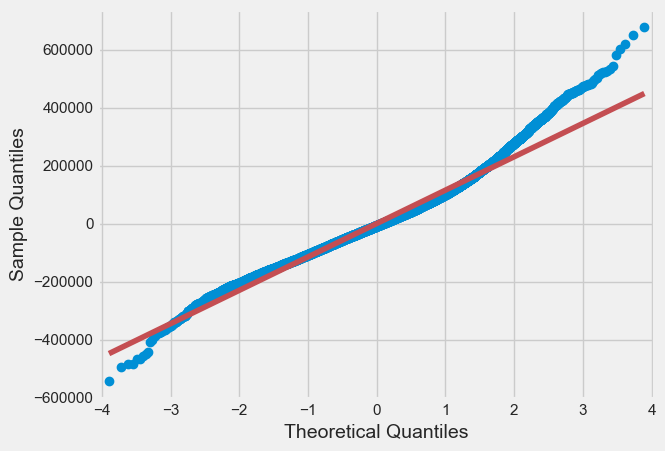

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')

使用Durbin-Watson統計量DW來檢驗自相關性，檢視是否殘差間相互獨立，以避免在估計迴歸係數時降低檢定立，結果如下:

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print('dw: %.3f' % dw)

dw: 1.973


這裡使用殘差圖，可以觀察模型的殘差與預測值之間的關係

Text(0, 0.5, 'Residual (standardization)')

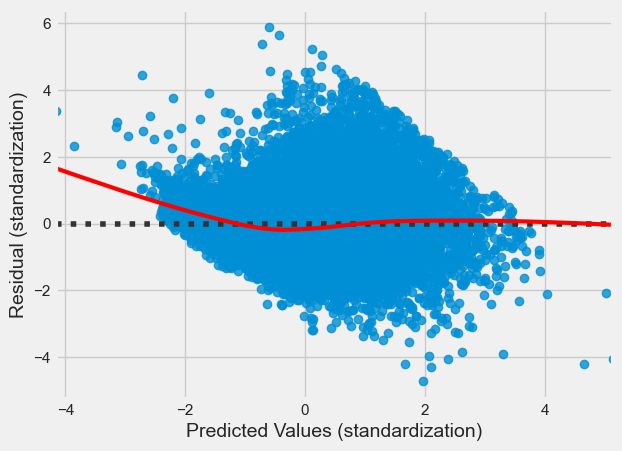

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

### Part III:  
### **7. 非線性迴歸模型**  

(1)簡單非線性回歸模型

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


sqft_living, price = df[['sqft_living']].values, df['price'].values
sqft_living[:3, :]

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def adj_r2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

r2_lst, mse_lst, y_plot_lst = [None], [None], [None]
# 產生繪圖的 x 座標
x_plot = np.linspace(sqft_living.min(), sqft_living.max(), 100).reshape(-1,1)

def reg_r2_mse(sqft_living, price, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    sqft_living = pol_d.fit_transform(sqft_living)
    
    lr = LinearRegression()
    lr = lr.fit(sqft_living, price)
    price_pred = lr.predict(sqft_living)
    r2_lst.append(adj_r2(r2_score(price, price_pred), sqft_living.shape[0], 1))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(sqft_living, price, 1)
reg_r2_mse(sqft_living, price, 2)
reg_r2_mse(sqft_living, price, 3)

r2_lst  



[None, 0.3872683367943449, 0.38735815914297544, 0.3903697783709037]

In [ ]:
def reg_r2_mse(sqft_living, price, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    sqft_living = pol_d.fit_transform(sqft_living)
    
    lr = LinearRegression()
    lr = lr.fit(sqft_living, price)
    price_pred = lr.predict(sqft_living)
    r2_lst.append(adj_r2(r2_score(price, price_pred), sqft_living.shape[0], 1))
    mse_lst.append(mean_squared_error(price, price_pred))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(sqft_living, price, 1)
reg_r2_mse(sqft_living, price, 2)
reg_r2_mse(sqft_living, price, 3)

mse_lst  # 三個迴歸模型的 MSE

[None, 26601340694.466133, 26597441116.491985, 26466693655.678562]

以下對sqft_living(自變數)和price(應變數)做degree為1到3的迴歸模型製作結果

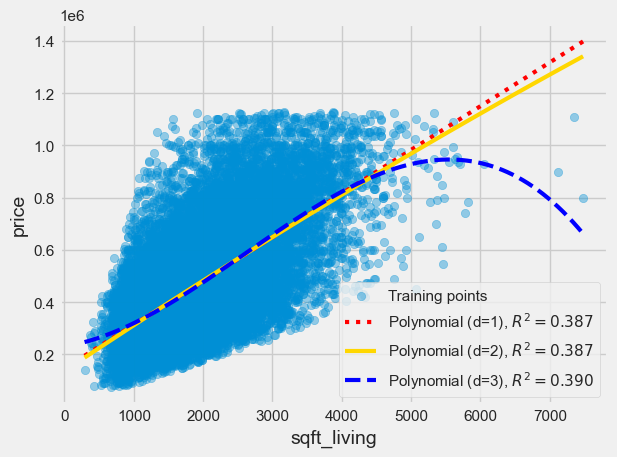

In [ ]:
plt.scatter(sqft_living, price, label='Training points', alpha=.4)

plt.plot(x_plot, y_plot_lst[1], 
         color='red', lw=3, linestyle=':', 
         label='Polynomial (d=1), $R^2=%.3f$' % r2_lst[1])

plt.plot(x_plot, y_plot_lst[2],
         color='gold', lw=3, linestyle='-',
         label='Polynomial (d=2), $R^2=%.3f$' % r2_lst[2])

plt.plot(x_plot, y_plot_lst[3],
         color='blue', lw=3, linestyle='--',
         label='Polynomial (d=3), $R^2=%.3f$' % r2_lst[3])

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='lower right')
plt.tight_layout()

(2)多元非線性回歸模型

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly = poly_reg.predict(X_test)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)  # 計算 MSE

print(f'多項式多元迴歸 (deg=1) 之 R^2: {poly_r2}')
print(f'多項式多元迴歸 (deg=1) 之 MSE: {poly_mse}') 

多項式多元迴歸 (deg=1) 之 R^2: 0.7042822558811739
多項式多元迴歸 (deg=1) 之 MSE: 13155297569.74636


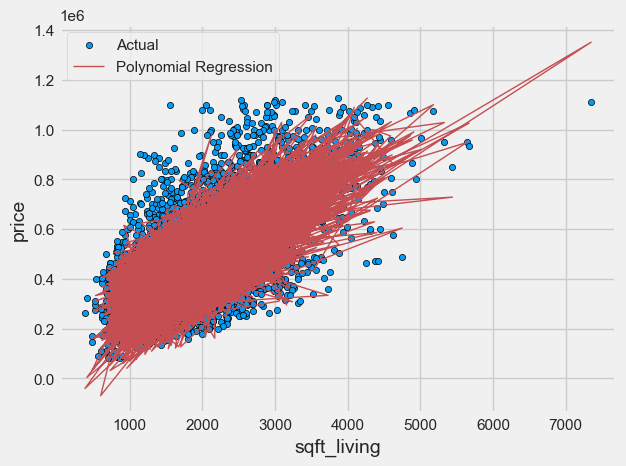

In [ ]:
plt.scatter(X_test['sqft_living'], y_test, facecolor='xkcd:azure', edgecolor='black', s=20, label='Actual')
plt.plot(X_test['sqft_living'], y_pred_poly, color='r', lw=1, label='Polynomial Regression')

plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly = poly_reg.predict(X_test)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)  # 計算 MSE

print(f'多項式多元迴歸 (deg=2) 之 R^2: {poly_r2}')
print(f'多項式多元迴歸 (deg=2) 之 MSE: {poly_mse}') 

多項式多元迴歸 (deg=2) 之 R^2: 0.7496126854385714
多項式多元迴歸 (deg=2) 之 MSE: 11138728386.287527


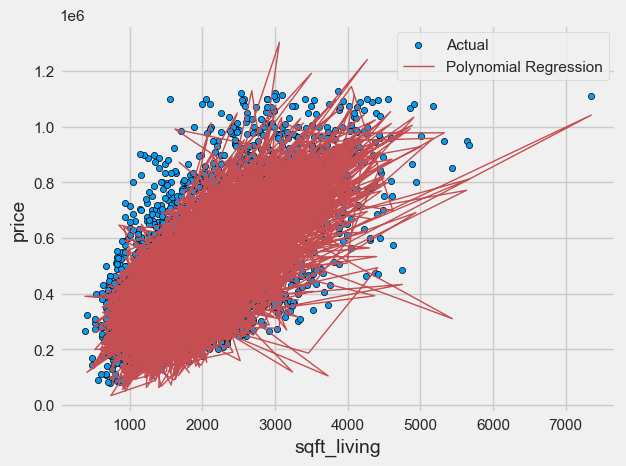

In [ ]:
plt.scatter(X_test['sqft_living'], y_test, facecolor='xkcd:azure', edgecolor='black', s=20, label='Actual')
plt.plot(X_test['sqft_living'], y_pred_poly, color='r', lw=1, label='Polynomial Regression')

plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend()
plt.show()

NameError: name 'LinearRegression' is not defined

### **8. 迴歸模型之正規化**  


(1)線性多元回歸模型之標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

# 進行標準化

scalar = StandardScaler()
X_std = scalar.fit_transform(X)
y_2d = y.values.reshape(-1, 1)
y_std = scalar.fit_transform(y_2d)

X_std[:1, :]

array([[ 0.        , -0.36122676, -1.47724228, -1.02677239, -0.22340379,
        -0.88643684, -0.05467465, -0.26940057, -0.62786432, -0.51056442,
        -0.65333261, -0.54221901, -0.19717669, -0.32394872, -0.30710573,
        -0.94688422, -0.25612702]])

(2)	接者使用Ridge回歸模型和交叉驗證(Cross-Validation)來選擇最佳的正則化參數alpha值

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
plt.style.use('fivethirtyeight')

# 利用交叉驗證找出最佳 alpha
alphas = np.logspace(-3, 3, 50)
reg_cv = RidgeCV(alphas, store_cv_values=True)
reg_cv.fit(X_std, y_std)
print('Best alpha: %.3f' % reg_cv.alpha_)

Best alpha: 33.932


(0.001, 1000.0)

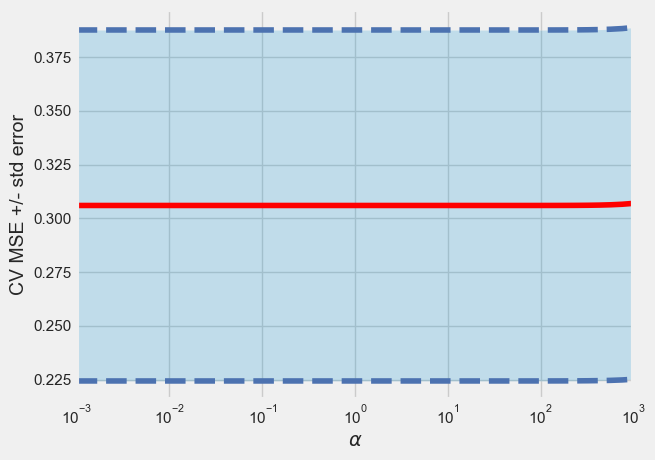

In [ ]:
scores = np.mean(reg_cv.cv_values_, axis=0)[0]
scores_std = np.std(reg_cv.cv_values_, axis=0)[0]

# 設定 x 軸為對數
plt.semilogx(alphas, scores, color='red')

# 繪製 MSE +/- 標準誤

std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')

plt.fill_between(alphas, scores+std_error, 
                 scores-std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$')
plt.xlim([alphas[0], alphas[-1]])

In [ ]:
# 因為已經標準化，所以把截距拿掉
model_ridge = Ridge(alpha=reg_cv.alpha_,
              fit_intercept=False)
model_ridge.fit(X_std, y_std)
df_coef = pd.DataFrame(data=model_ridge.coef_, 
                       columns=X.columns[:17])
df_coef

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.0,-0.03685,0.080736,0.263664,0.045511,0.08108,0.031122,0.089686,0.088698,0.359965,-0.001515,-0.240165,0.02669,0.359163,-0.009054,0.149866,-0.017812


(3)	結果

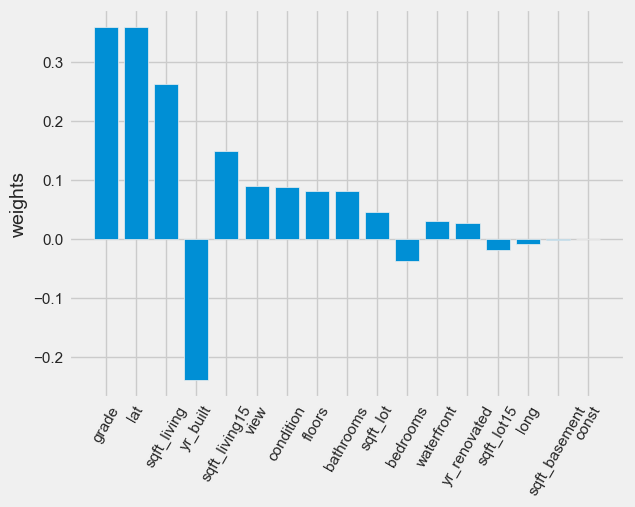

In [ ]:
coef = np.array(df_coef)[0]
# 依迴歸係數的絕對值排序(由大到小)
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], 
           rotation=60)
plt.ylabel('weights');

In [ ]:
# 使用訓練好的Ridge模型進行預測
y_pred_std = model_ridge.predict(X_std)

# 將預測結果轉換回原始尺度
y_pred = scalar.inverse_transform(y_pred_std)

# 計算MSE
mse = mean_squared_error(y, y_pred)
print('Ridge回歸模型之MSE:', mse)

# 將實際目標變量轉換回原始尺度
y_true = scalar.inverse_transform(y_std)

# 計算R^2
r2 = r2_score(y_true, y_pred)
print('Ridge回歸模型之R^2:', r2)

Ridge回歸模型之MSE: 13251621860.171633
Ridge回歸模型之R^2: 0.694778858876094


### **9. 相關模型結果比較分析**  

由6個模型整理出個別的MSE和R^2:  
(1) 簡單迴歸模型:  
deg = 1 :   MSE : 26601340694.466、R^2 : 0.387  
deg = 2 :   MSE : 26597441116.492、R^2 : 0.387  
deg = 3 :   MSE : 26466693655.679、R^2 : 0.390  
(2) 多元迴歸模型:  
deg = 1 :   MSE : 13155297569.746、R^2 : 0.704  
deg = 2 :   MSE : 11138728386.287、R^2 : 0.750  
(3) Ridge回歸模型  
MSE : 13251621860.172、R^2 : 0.694